In [4]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
import mglearn as mg
import sklearn.ensemble as ske
%matplotlib inline

# Random Forest

### Make Moon Dataset

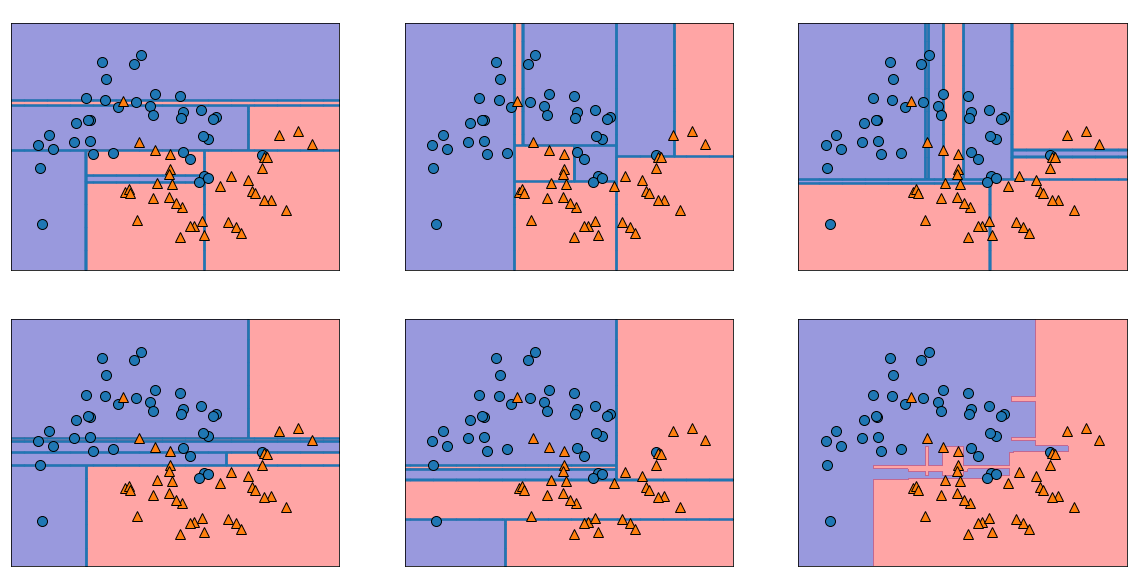

In [8]:
X, y = sk.datasets.make_moons(n_samples = 100, noise = 0.25, random_state = 3)
Xtrain, Xtest, ytrain, ytest = sk.model_selection.train_test_split(X, y, stratify = y, random_state = 42)
forest = ske.RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(Xtrain, ytrain)
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i), color="w")
    mg.plots.plot_tree_partition(Xtrain, ytrain, tree, ax=ax)
mg.plots.plot_2d_separator(forest, Xtrain, fill=True, ax = axes[-1, -1], alpha=.4)
mg.discrete_scatter(Xtrain[:, 0], Xtrain[:, 1], ytrain)

### Cancer Dataset

In [9]:
cancer_dataset = sk.datasets.load_breast_cancer()
Xtrain , Xtest, ytrain, ytest = sk.model_selection.train_test_split(cancer_dataset.data, cancer_dataset.target, stratify = cancer_dataset.target, random_state = 42)
forest = ske.RandomForestClassifier(n_estimators=100, random_state = 0)
forest.fit(Xtrain, ytrain)
print("Training Accuracy : {:.2f}".format(forest.score(Xtrain, ytrain)))
print("Testing Accuracy : {:.2f}".format(forest.score(Xtest, ytest)))

Training Accuracy : 1.00
Testing Accuracy : 0.96


#### Points to be noted
Set max_features to be :
* sqrt(n_features) for classification
* log2(n_features) for regression 

in case of Random Forest

# Gradient boosted Regression Trees

In [13]:
gbrt = ske.GradientBoostingClassifier(random_state = 42)
gbrt.fit(Xtrain, ytrain)
print("Training Accuracy : {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Testing Accuracy : {:.3f}".format(gbrt.score(Xtest, ytest)))

## Applying Pre-Pruning
gbrt = ske.GradientBoostingClassifier(random_state = 42, max_depth = 1)
gbrt.fit(Xtrain, ytrain)
print("Training Accuracy : {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Testing Accuracy : {:.3f}".format(gbrt.score(Xtest, ytest)))

gbrt = ske.GradientBoostingClassifier(random_state = 42, learning_rate = 0.01)
gbrt.fit(Xtrain, ytrain)
print("Training Accuracy : {:.3f}".format(gbrt.score(Xtrain, ytrain)))
print("Testing Accuracy : {:.3f}".format(gbrt.score(Xtest, ytest)))


### For applying gradient boosting to larger dataset use xgboost


Training Accuracy : 1.000
Testing Accuracy : 0.958
Training Accuracy : 0.988
Testing Accuracy : 0.958
Training Accuracy : 0.988
Testing Accuracy : 0.937
